<a href="https://colab.research.google.com/github/Jenn122/graficos-de-dispersion/blob/main/Proyecto_Estaci%C3%B3n_meteorol%C3%B3gica_en_casa_Jennifer_Bola%C3%B1os_Cabrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Codigo utilizado en una base meteorologica**

**## Terminal**

```
# from sense_hat import SenseHat
from datetime import datetime
import numpy as np
#import time
import os
sense=SenseHat()
```
```
# #sense.clear()
Toma_datos=datetime.now().strftime('%Y-%m-%d')+ ' .csv'
if not os.path.exists("/home/computo/Desktop/Toma_datos-04-10-23/"+Toma_datos):
    f=open('/home/computo/Desktop/Toma datos-04-10' +Toma_datos,'w')
    f.write("Datetime,Humedad,Temperatura,Presion\r\n")
    f.close()
else:
   d=open("/home/computo/Desktop/Toma_datos-04-10-23/"+Toma_datos,'a')
    d.write(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    humedad=sense.get_humidity()
    temp=sense.get_temperature()
    presion=sense.get_pressure()
    d.write(',{:.2f},{:.2f},{:.2f}\r\n'.format(humedad,temp,presion))
    d.close()
```
```
message=("OK")
sense.show_message(message, scroll_speed=0.09)
```
### **Funcion de los codigos**
1. Crea una variable llamada Toma_datos que almacena la fecha actual en formato de cadena y agrega la extensión .csv al final.
2. Verifica si un archivo con el nombre almacenado en la variableToma_datos existe en la ruta,si el archivo no existe, se ejecuta el código dentro del bloque if.
3. Crea un nuevo archivo con el nombre almacenado en la variable
4. Escribe una línea de encabezado en el archivo recién creado. La línea de encabezado contiene los nombres de las columnas separados por comas.
5. Esta línea cierra el archivo.

**Else**

6. Abre el archivo existente con el nombre almacenado en la variable en la ruta.
7. Esta línea escribe la fecha y hora actuales en el archivo, separados por comas.
8. Lee el valor actual de humedad del sensor Sense Hat y lo almacena en la variable humedad.
9. Lee el valor actual de temperatura del sensor Sense Hat y lo almacena en la variable temp.
10. Lee el valor actual de presión del sensor Sense Hat y lo almacena en la variable presion.
11. Escribe los valores de humedad, temperatura y presión en el archivo, separados por comas y con dos decimales de precisión. La secuencia \r\n indica que se debe agregar una nueva línea después de escribir los datos.











**#### Analisis de datos CSV**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from datetime import datetime
# Importamos las librerias que se van a necesitar para ejecutar codigos que se usaran para copilar datos

In [ ]:
listfile=glob.glob("2023*.csv") # Se usa glob para encontrar los archivos similares a 2023
listfile.sort() # Con sort se organizan los archivos del mas antiguo al mas reciente

In [ ]:
listfile # Se muestra la lista que se forma con todos los archivos en orden

['2023-10-10 (1).csv',
 '2023-10-11 (1).csv',
 '2023-10-12 (1).csv',
 '2023-10-13 (1).csv',
 '2023-10-14 (1).csv',
 '2023-10-15 (1).csv',
 '2023-10-16 (1).csv',
 '2023-10-22.csv',
 '2023-10-27.csv',
 '2023-10-29.csv',
 '2023-10-30.csv',
 '2023-10-31.csv',
 '2023-11-01.csv',
 '2023-11-02.csv',
 '2023-11-03.csv',
 '2023-11-04.csv',
 '2023-11-05.csv']

In [ ]:
dataframes = []# Crea una lista de archivos y va asignando el nombre a Dataframes
for file in listfile: # cada archivo esta en listfull
    df = pd.read_csv(file) # Ingresa o identifica todos los archivos csv
    dataframes.append(df) # Append para ir agrupando archivos csv
    datafull = pd.concat(dataframes, ignore_index=True, axis=0) # Agrupa a todos los archivos de la lista

**Especificando las siguientes cuatro lineas**

**Parametros**
1. Axis: Especifica si se van a eliminar las filas **axis=1,2**
2. Index: Especifica el indice de la fila que se desea eliminar


In [ ]:
tiempo=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S") # Percibe si es una variable de tiempo para que no sea un str

In [ ]:
datafull=datafull.drop(["Datetime"], axis=1) # Va eliminando la columna datetime de un objeto datafull

In [ ]:
datafull.insert(0,"Tiempo", tiempo, True) # Inserta la columna de tiempo al dataframe, mientras que el argumento true lo marca como sustituido

In [ ]:
dataf=datafull.sort_values(by=["Tiempo"], ignore_index=True) # Ordena los datos de un dataframe por los valores de una sola columna

In [ ]:
dataf.describe() # Datos marcados estadisticamente del dataf

,Humedad,Temperatura,Presion
count,654.000000,654.000000,654.000000
mean,39.331713,36.323609,793.782630
std,5.551267,2.460028,108.732697
min,28.870000,28.560000,0.000000
25%,34.115000,34.122500,804.042500
50%,41.010000,36.340000,807.380000
75%,43.975000,38.385000,811.870000
max,64.520000,40.700000,819.860000


In [ ]:
dataf["Presion"].replace(0, np.nan, inplace=True) # Va reemplazando los valores de cero a NAN
# np.isnan(dataf['Presion'])

**Parametro**
1. Inplace: Especifica si se va a modificar el dataframe original o crear una copia del dataframe con la fila eliminada

In [ ]:
dataf.describe() # Vuelve a marcar estadisticas del dataf

,Humedad,Temperatura,Presion
count,654.000000,654.000000,642.000000
mean,39.331713,36.323609,808.619688
std,5.551267,2.460028,5.279825
min,28.870000,28.560000,799.650000
25%,34.115000,34.122500,804.112500
50%,41.010000,36.340000,807.530000
75%,43.975000,38.385000,811.937500
max,64.520000,40.700000,819.860000


In [ ]:
dataf.drop([654],axis=0,inplace=True) # Se obtiene la media de la columna -presion- y la va acumulando en la variable prom,
# Al final llena los valores que faltan -NAN- de la columna con la variable prom
# Se elimina la fila 654

In [ ]:
prom= dataf['Presion'].mean() # Obtiene promedios
dataf['Presion'].fillna(value=prom,inplace=True)

In [ ]:
dataf # Dataf de los campos por cada columna

,Tiempo,Humedad,Temperatura,Presion
0,2023-10-10 09:30:02,42.94,34.81,808.619688
1,2023-10-10 13:00:03,46.42,33.09,808.619688
2,2023-10-10 13:30:02,38.30,37.52,807.080000
3,2023-10-10 14:00:02,37.96,36.88,806.650000
4,2023-10-10 14:30:01,34.56,37.48,806.190000
...,...,...,...,...
649,2023-11-05 18:00:02,41.89,35.19,800.220000
650,2023-11-05 18:30:02,41.77,35.16,800.600000
651,2023-11-05 19:00:02,41.64,34.88,800.800000
652,2023-11-05 19:30:02,41.62,35.33,801.320000


In [ ]:
type(dataf['Presion'][0])

numpy.float64

In [ ]:
np.isnan(dataf['Presion']) # Se comprueba que los valores de datafull son NAN

0      False
1      False
2      False
3      False
4      False
       ...  
649    False
650    False
651    False
652    False
653    False
Name: Presion, Length: 654, dtype: bool

In [ ]:
j=0 # Para ver si es posible encontrar NAN
for i in dataf['Presion']:
    # print(i)
    if np.isnan(i):
        j +=1
print(j)

0


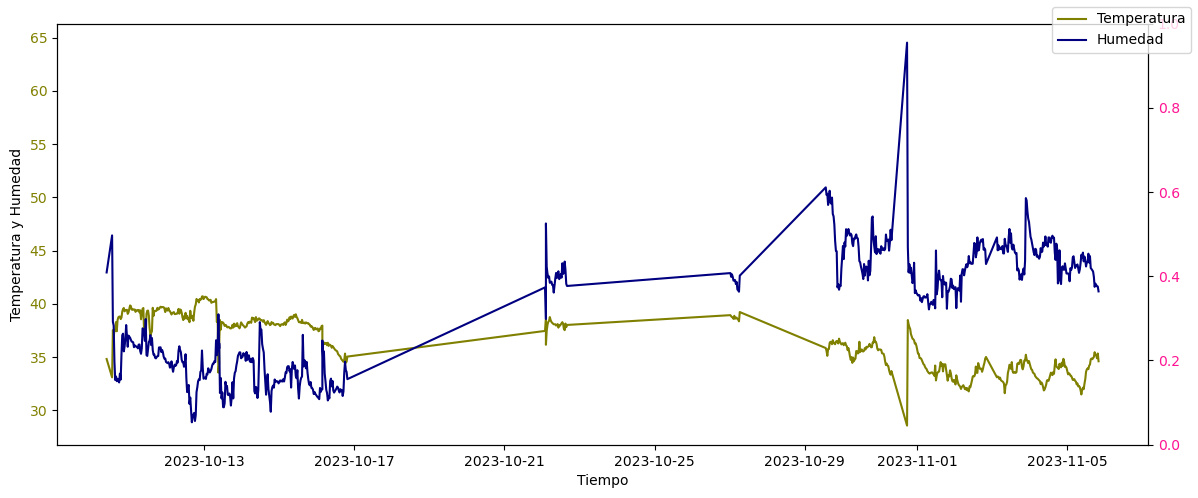

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,5)) # Define el tamaño de la figura
ax1.set_xlabel("Tiempo") # Define el nombre del eje x
ax1.set_ylabel("Temperatura y Humedad") # Define el nombre del eje y
ax1.plot(dataf["Tiempo"], dataf["Temperatura"], label="Temperatura", color="olive") # Asigna etiqueta a la variable
ax1.tick_params (axis='y', labelcolor="olive") # Definicion de color de los valores de temperatura
ax1.plot(dataf["Tiempo"], dataf["Humedad"], label="Humedad", color="navy") #  Va asignando la etiqueta a la variable de humedad
ax2=ax1.twinx() # Se agrega el eje al lado derecho
#ax2.set_ylabel("Presion") # Se asigna el nombre del eje y a T y H
#ax2.plot(dataf["Tiempo"], dataf["Presion"],label="Presion", color="deeppink") # Se le va asignando una etiqueta a la variable tiempo
ax2.tick_params (axis='y', labelcolor="deeppink") # Le asigna el valor a la variable T y H
fig.legend(loc=1) # Leyenda
fig.tight_layout()
#"upper right"

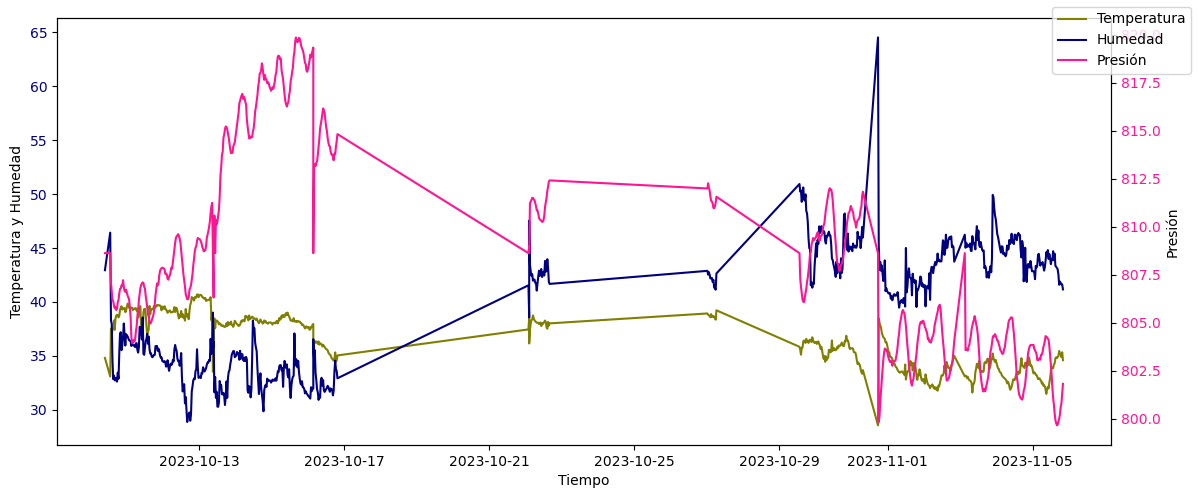

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura y Humedad")
ax1.plot(dataf["Tiempo"], dataf["Temperatura"], label="Temperatura", color="olive")
ax1.tick_params (axis='y', labelcolor="navy")
ax1.plot(dataf["Tiempo"], dataf["Humedad"], label="Humedad", color="navy")
ax2=ax1.twinx()
ax2.set_ylabel("Presión")
ax2.plot(dataf["Tiempo"], dataf["Presion"],label="Presión", color="deeppink")
ax2.tick_params (axis='y', labelcolor="deeppink")
fig.legend(loc=1)
fig.tight_layout()
#"upper right"

Text(0.5, 1.0, 'Humedad')

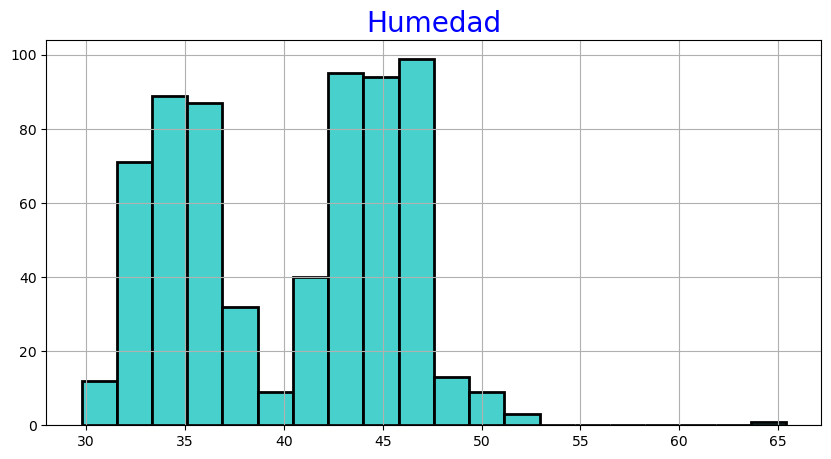

In [ ]:
plt.figure(figsize=(10,5)) # Define el tamaño del grafico
dataf["Humedad"].hist(bins=20, align='right', color='mediumturquoise', edgecolor='black',linewidth=2) # Crea la grafica los colores asignados
plt.title('Humedad',fontsize=20, color= 'b') # Define el titulo de la grafica

Text(0.5, 1.0, 'Temperatura')

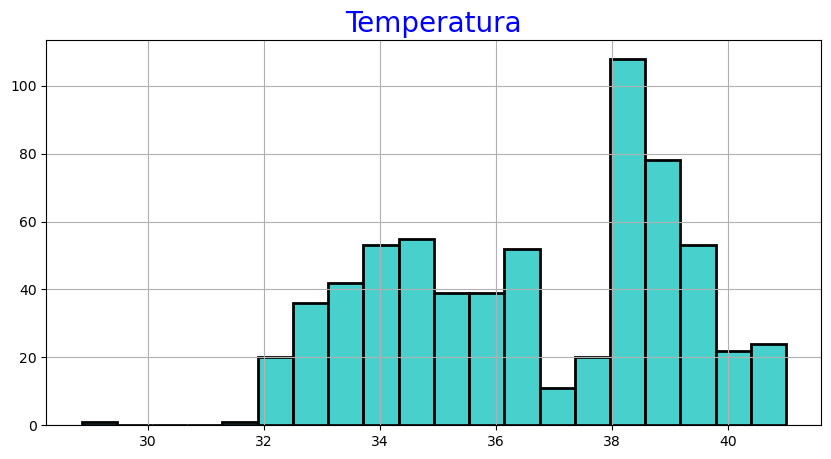

In [ ]:
plt.figure(figsize=(10,5))
dataf["Temperatura"].hist(bins=20, align='right', color='mediumturquoise', edgecolor='black',linewidth=2)
plt.title('Temperatura',fontsize=20, color= 'b')

Text(0.5, 1.0, 'Presión')

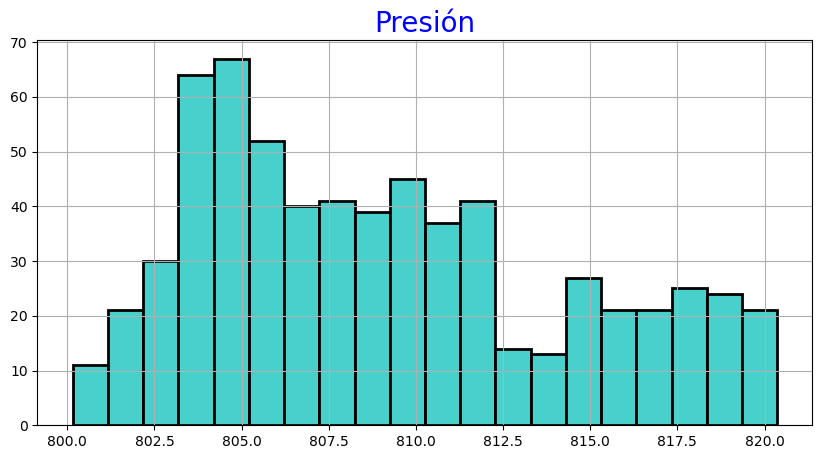

In [ ]:
plt.figure(figsize=(10,5))
dataf["Presion"].hist(bins=20, align='right', color='mediumturquoise', edgecolor='black',linewidth=2)
plt.title('Presión',fontsize=20, color= 'b')